# M2 Metric Analysis

The tabular results of evaluating the M2 star count metric for the RGPS survey design and all science cases can be found in the metric_results/ directory.  The goal of this notebook is to explore those results in graphical form. 

In [1]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
from astropy.table import Table, Column, vstack
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import config_utils
import regions
import plot_metric_results
import visualization_utils
import numpy as np
from astropy import units as u 
from mw_plot import MWSkyMap

## Setup

First we need to load some of the configuration information for the metric simulation for future reference.

In [2]:
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

In [3]:
# Load the survey regions
all_survey_regions = regions.load_regions_from_file(sim_config, path.join(sim_config['root_dir'], 'region_data', 'rgps_survey_regions.json'))

In [4]:
# Load definitions of science cases and extract the set of topical categories
science_cases = config_utils.read_config(path.join(getcwd(), '..', 'config', 'rgps_science_cases.json'))

science_categories = []
for author, info in science_cases.items():
    if info['ready_for_use'] and info['category'] not in science_categories:
        science_categories.append(info['category'])
science_categories

['wide_area',
 'time_domain',
 'SFR',
 'solar_system',
 'high_cadence',
 'globular_clusters',
 'molecular_clouds',
 'AGN',
 'open_clusters',
 'variable_stars',
 'galactic_center',
 'keyholes',
 'stellar_spectra',
 'extinction',
 'novae',
 'ISM',
 'YSO',
 'GW']

## M2 Star Counts Metric

The star counts metric depends quite simply on the survey footprint rather than on each science case and so can be calculated and plotted easily

In [7]:
# Load the M2 metric results
m2_results_file = path.join(getcwd(), '..', 'metric_results', 'M2_star_counts_results.txt')

m2_results = Table.read(m2_results_file, format='ascii')
m2_results

Survey_strategy,Optic,M2_nstars
str12,str4,float64
wide_area,F062,0.0
wide_area,F087,0.0
wide_area,F106,666105615.5201381
wide_area,F129,325000245211.81464
wide_area,F158,345451346742.3365
wide_area,F184,253157686776.17026
wide_area,F213,364895047480.89526
wide_area,F146,0.0
wide_area,G150,0.0


/var/folders/1d/5hlyfsgd0kl_nd815xmp9cv00000gn/T/ipykernel_46153/1115641908.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=20, horizontalalignment='right')


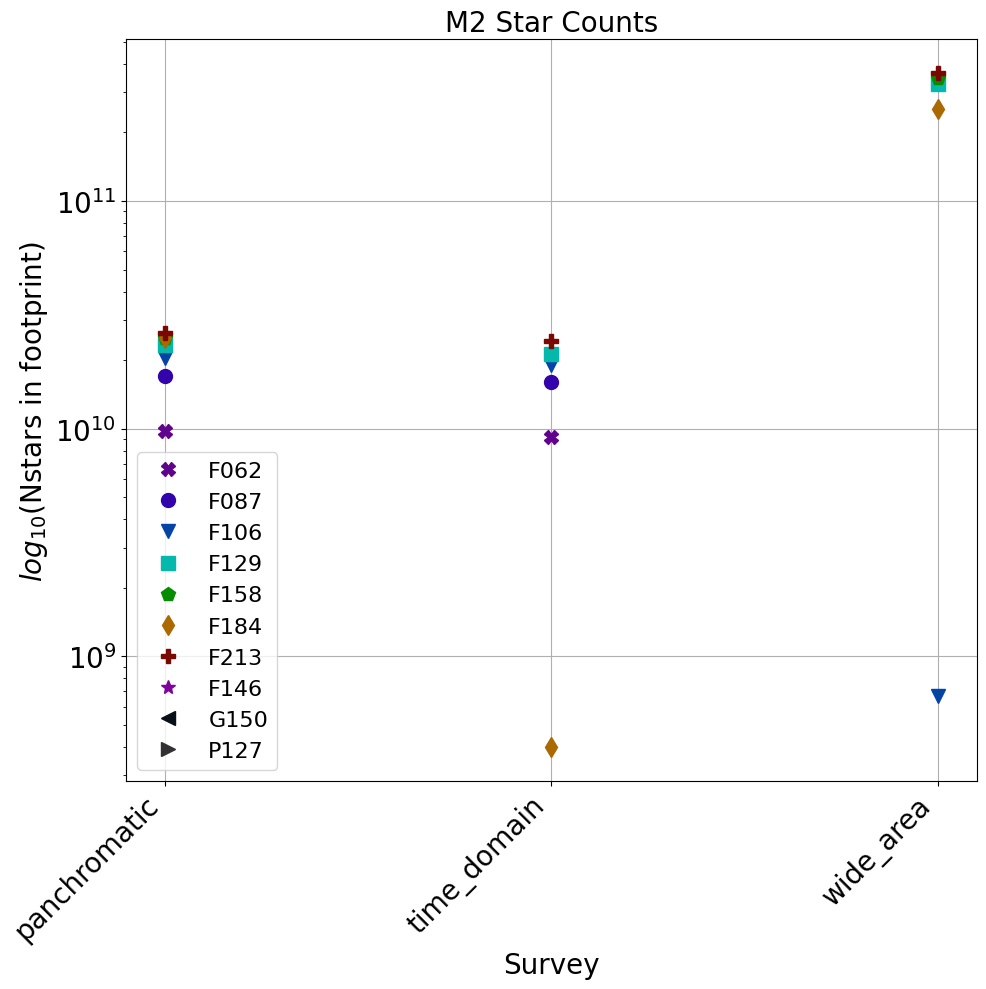

In [15]:
# Select the metric results for the current filter and all science cases and survey designs
survey_options = list(set(m2_results['Survey_strategy'].data))
survey_options.sort()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

for optic in sim_config['OPTICAL_COMPONENTS']:
    
    data = []
    for k, survey_name in enumerate(survey_options):
        idx1 = np.where(m2_results['Optic'] == optic)[0]
        idx2 = np.where(m2_results['Survey_strategy'] == survey_name)[0]
        idx = list(set(idx1).intersection(set(idx2)))
        metric_filter = m2_results[idx]
        data.append(metric_filter['M2_nstars'][0])

    ax.plot(range(0,len(survey_options),1), data, 
            color=sim_config['PLOT_COLORS'][optic], marker=sim_config['PLOT_SYMBOLS'][optic], 
            markersize=10, ls='none',
            label=optic)
    #ax.plot(range(0,len(survey_options),1), data, color='grey', linestyle='-')

ax.set_xlabel('Survey', fontsize=20)
ax.set_ylabel('$log_{10}$(Nstars in footprint)', fontsize=20)
ax.set_title('M2 Star Counts', fontsize=20)
ax.set_xticks(range(0,len(survey_options),1))
ax.set_xticklabels(survey_options, rotation=45.0, horizontalalignment='right', fontsize=20)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels(yticklabels, fontsize=20, horizontalalignment='right')
ax.set_yscale('log')
ax.grid()
ax.legend(fontsize=16)
plt.tight_layout()
plt.savefig(path.join(sim_config['root_dir'], 'metric_results', 'm2_results.png'))